## 1. Business Understanding
Tujuan:
Mr. Cho ingin membeli properti rumah yang sesuai dengan kriteria tertentu untuk memastikan investasi yang bijaksana.

Permasalahan:
Mr. Cho perlu mengidentifikasi rumah-rumah yang memenuhi kriteria:

- Dibangun minimal tahun 1990, atau
- Jika dibangun sebelum tahun 1990, harus pernah direnovasi setidaknya sekali setelah tahun 2000.

Kebutuhan:
Mr. Cho memerlukan analisis yang mencakup:

- Identifikasi rumah yang memenuhi kriteria di atas.
- Penanganan data yang tidak konsisten, nilai hilang, outlier, dan duplikasi data.
- Visualisasi data untuk memahami karakteristik dan distribusi rumah.
- Rekomendasi rumah berdasarkan analisis data.

## 2. Data Understanding

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

file_path = 'data_porto_2.csv'
df = pd.read_csv(file_path)

df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [ ]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

## 3. Data Preparation

In [ ]:
# Mengidentifikasi kolom numerik dan non-numerik
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
non_numeric_columns = df.select_dtypes(exclude=[np.number]).columns.tolist()

In [ ]:
# Mengisi missing values
# Kolom numerik dengan median
df[numeric_columns] = df[numeric_columns].apply(lambda x: x.fillna(x.median()))
# Kolom non-numerik dengan modus
df[non_numeric_columns] = df[non_numeric_columns].apply(lambda x: x.fillna(x.mode()[0]))

In [ ]:
zero_values = (df == 0).sum()
zero_values

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       3411
view             3411
condition           0
sqft_above          0
sqft_basement    2163
yr_built            0
yr_renovated     2038
street              0
city                0
statezip            0
country             0
log_price           0
renovated           0
dtype: int64

In [ ]:
missing_values = df.isnull().sum()
missing_values

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
log_price        0
renovated        0
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
# Identifikasi outliers menggunakan IQR untuk kolom numerik
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
# Mengidentifikasi outlier
outliers = ((df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR))).sum()
print(outliers)

# Menghapus outlier
df = df[~((df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
log_price        0
dtype: int64


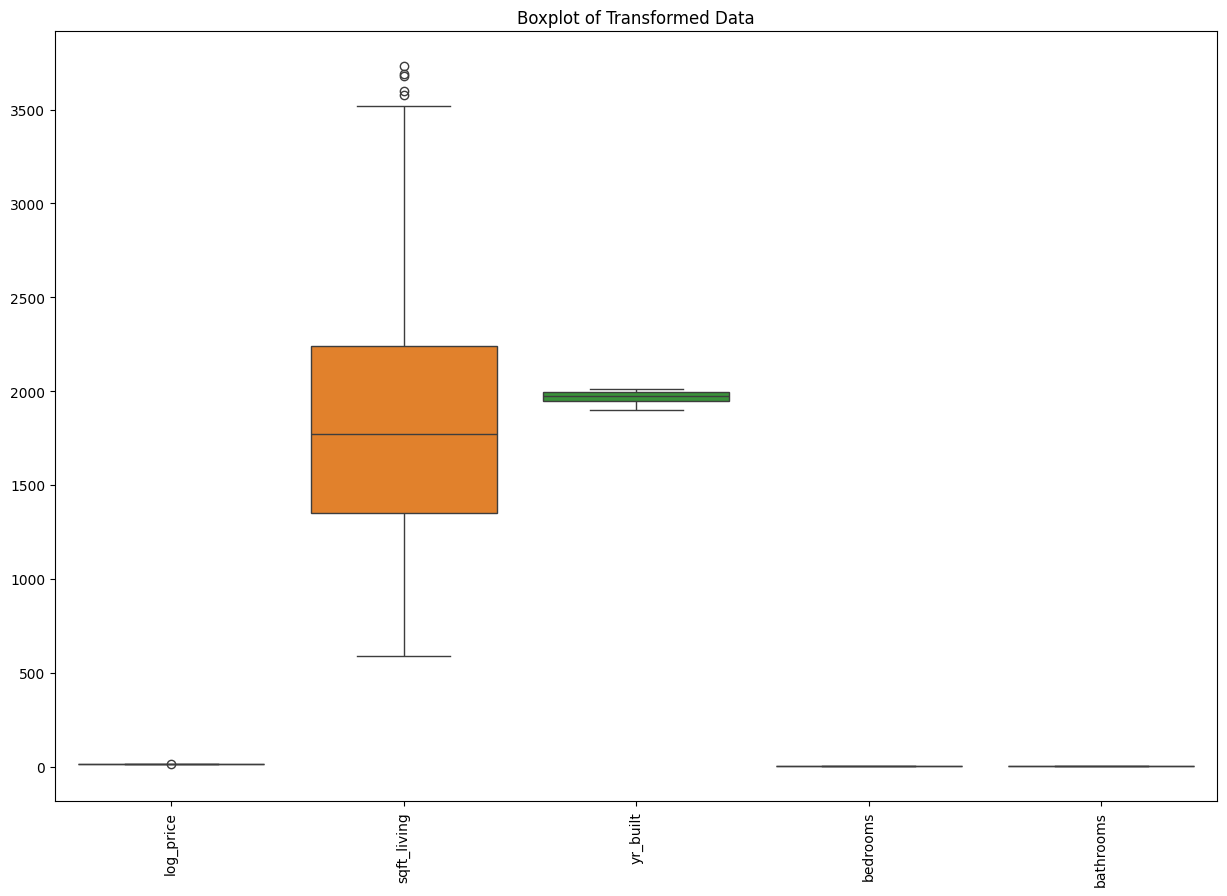

In [ ]:
df['log_price'] = np.log(df['price'])

plt.figure(figsize=(15, 10))
sns.boxplot(data=df[['log_price', 'sqft_living', 'yr_built', 'bedrooms', 'bathrooms']])
plt.xticks(rotation=90)
plt.title('Boxplot of Transformed Data')
plt.show()

In [ ]:
duplicates = df.duplicated().sum()
duplicates

df = df.drop_duplicates()

## 4. EDA

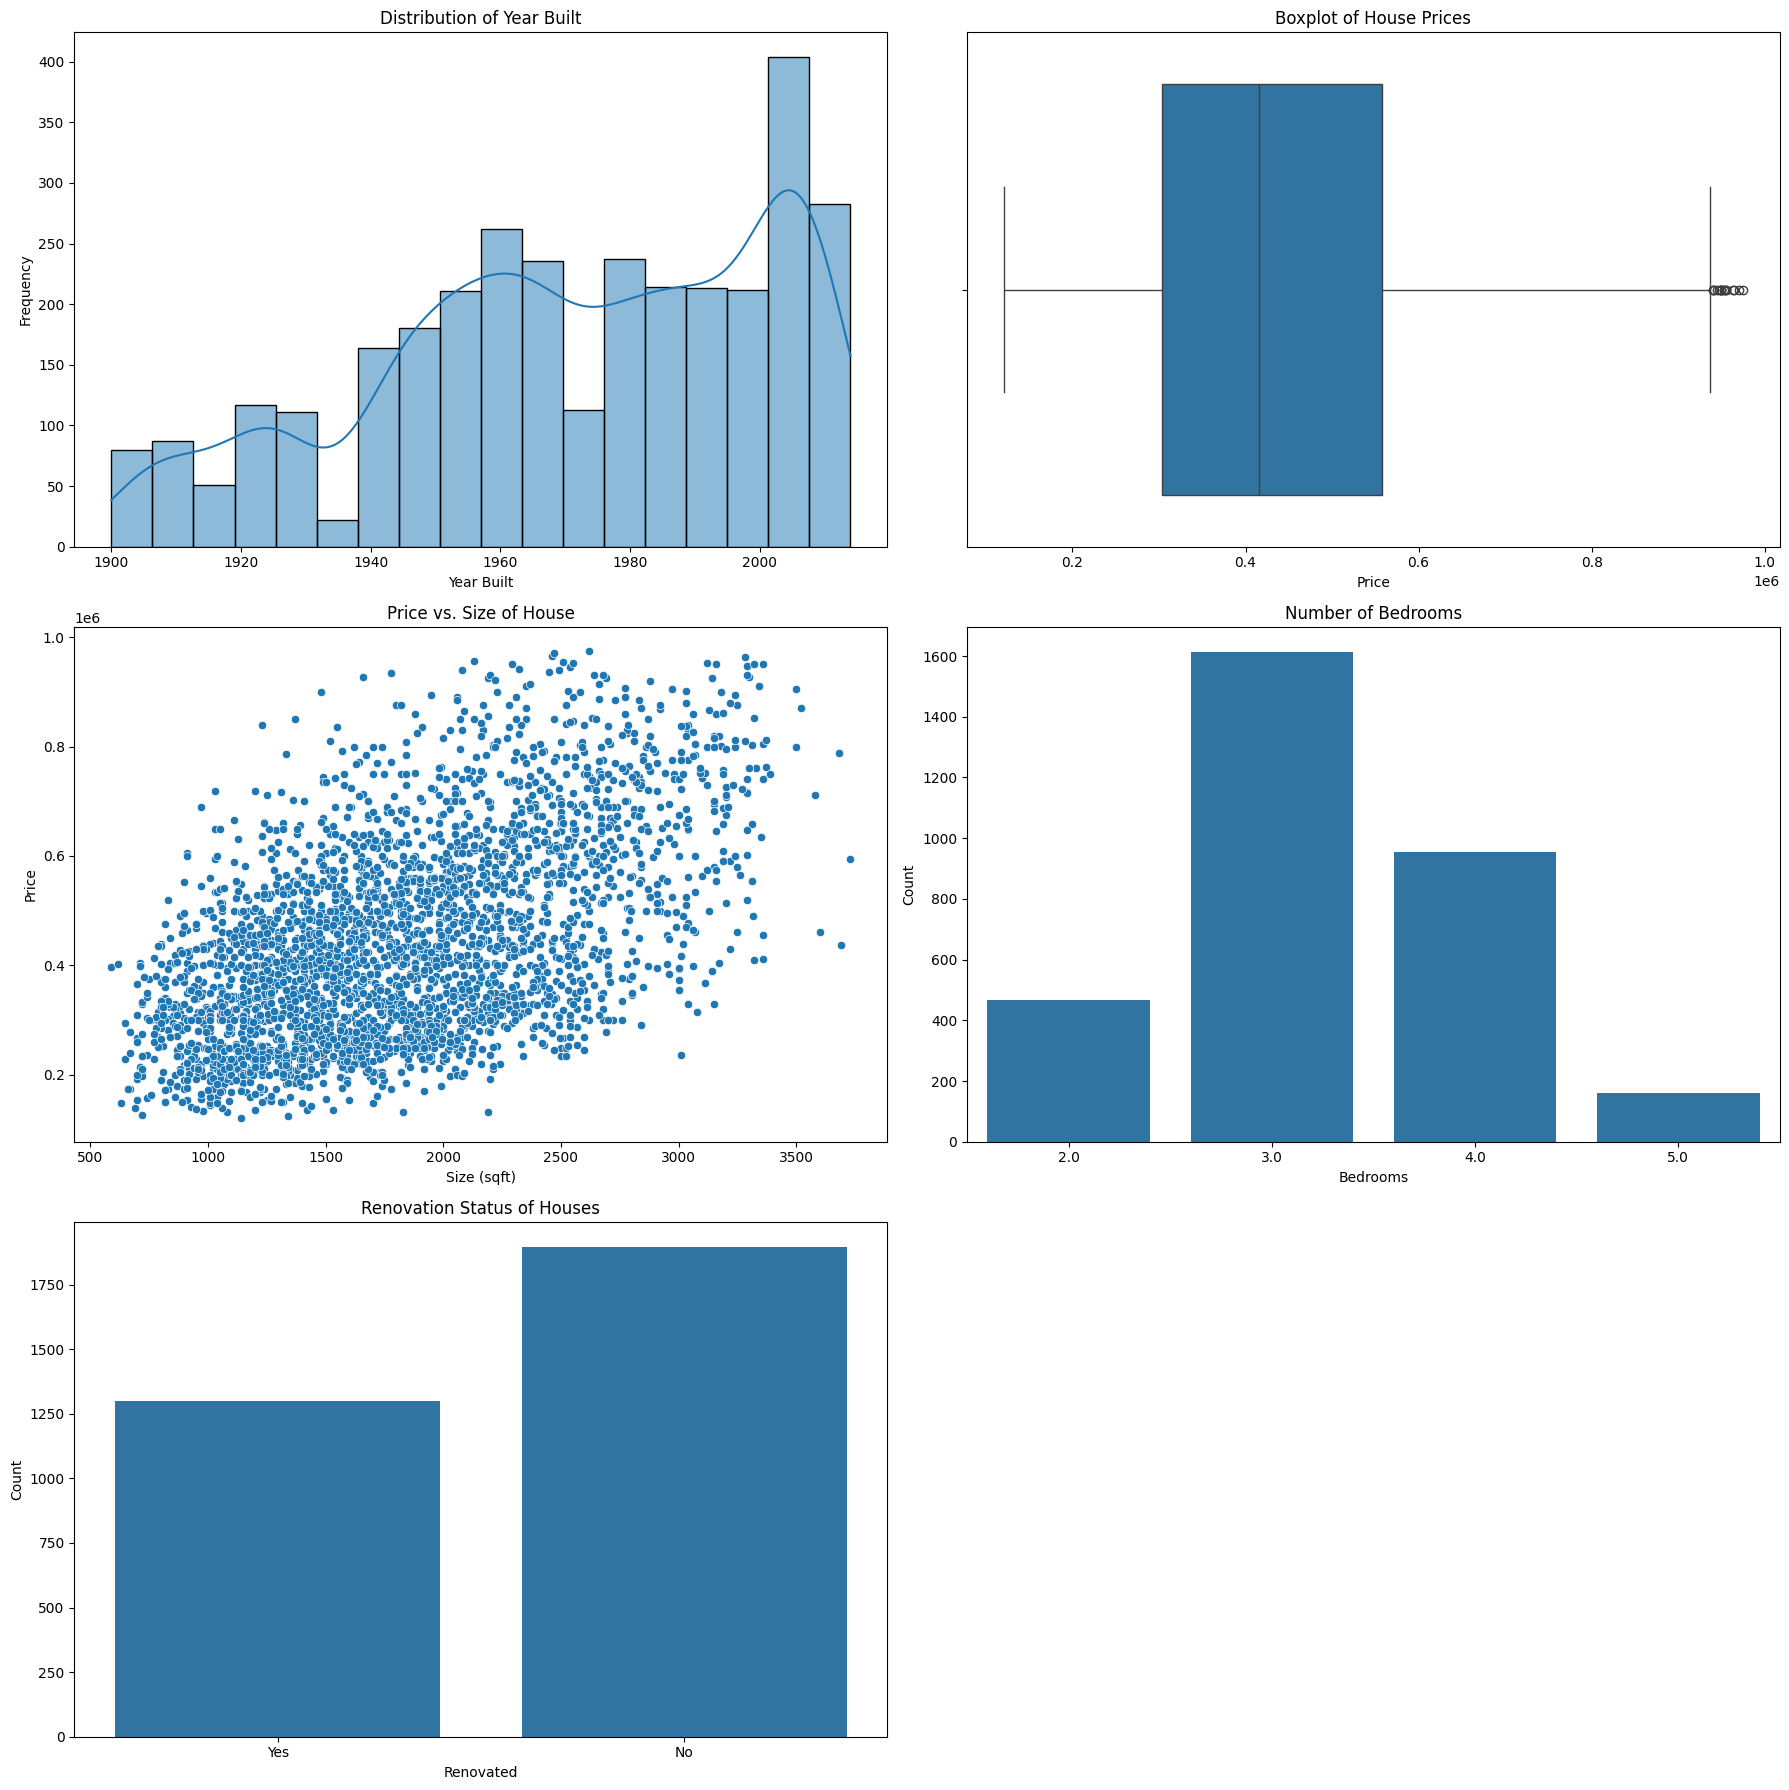

In [ ]:
fig, ax = plt.subplots(3, 2, figsize=(18, 18))

sns.histplot(df['yr_built'], kde=True, ax=ax[0, 0])
ax[0, 0].set_title('Distribution of Year Built')
ax[0, 0].set_xlabel('Year Built')
ax[0, 0].set_ylabel('Frequency')

sns.boxplot(x='price', data=df, ax=ax[0, 1])
ax[0, 1].set_title('Boxplot of House Prices')
ax[0, 1].set_xlabel('Price')

sns.scatterplot(x='sqft_living', y='price', data=df, ax=ax[1, 0])
ax[1, 0].set_title('Price vs. Size of House')
ax[1, 0].set_xlabel('Size (sqft)')
ax[1, 0].set_ylabel('Price')

sns.countplot(x='bedrooms', data=df, ax=ax[1, 1])
ax[1, 1].set_title('Number of Bedrooms')
ax[1, 1].set_xlabel('Bedrooms')
ax[1, 1].set_ylabel('Count')

df['renovated'] = df['yr_renovated'].apply(lambda x: 'Yes' if x > 0 else 'No')
sns.countplot(x='renovated', data=df, ax=ax[2, 0])
ax[2, 0].set_title('Renovation Status of Houses')
ax[2, 0].set_xlabel('Renovated')
ax[2, 0].set_ylabel('Count')

ax[2, 1].axis('off')

plt.tight_layout()

plt.show()

## 5. Rekomendasi Rumah

In [ ]:
recommended_houses = df[(df['yr_built'] >= 1990) | ((df['yr_built'] < 1990) & (df['yr_renovated'] > 2000))]

recommended_houses

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,log_price,renovated
0,2014-05-02 00:00:00,313000.000000,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,12.653958,Yes
9,2014-05-02 00:00:00,640000.000000,4.0,2.0,1520,6200,1.5,0,0,3,1520,0,1945,2010,6811 55th Ave NE,Seattle,WA 98115,USA,13.369223,Yes
13,2014-05-02 00:00:00,365000.000000,3.0,1.0,1090,6435,1.0,0,0,4,1090,0,1955,2009,2504 SW Portland Ct,Seattle,WA 98106,USA,12.807653,Yes
17,2014-05-02 00:00:00,367500.000000,4.0,3.0,3110,7231,2.0,0,0,3,3110,0,1997,0,11224 SE 306th Pl,Auburn,WA 98092,USA,12.814479,No
19,2014-05-02 00:00:00,275000.000000,3.0,1.5,1180,10277,1.0,0,0,3,1180,0,1983,2009,12425 415th Ave SE,North Bend,WA 98045,USA,12.524526,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4593,2014-07-08 00:00:00,289373.307692,3.0,2.5,2538,4600,2.0,0,0,3,2538,0,2013,1923,5703 Charlotte Ave SE,Auburn,WA 98092,USA,12.575473,Yes
4594,2014-07-09 00:00:00,210614.285714,3.0,2.5,1610,7223,2.0,0,0,3,1610,0,1994,0,26306 127th Ave SE,Kent,WA 98030,USA,12.257784,No
4596,2014-07-09 00:00:00,534333.333333,3.0,2.5,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA,13.188775,Yes
4597,2014-07-09 00:00:00,416904.166667,3.0,2.5,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA,12.940612,No
